# Predicting Customer Churn - Modeling and prediction

### Data Description:

The raw data contains 7043 rows (customers data) and 21 columns (features).

**Field Descriptions**
- customerID - Customer ID
- gender - Whether the customer is a male or a female
- SeniorCitizen - Whether the customer is a senior citizen or not (1, 0)
- Partner - Whether the customer has a partner or not (Yes, No)
- Dependents - Whether the customer has dependents or not (Yes, No)
- tenure - Number of months the customer has stayed with the company
- PhoneService - Whether the customer has a phone service or not (Yes, No)
- MultipleLines - Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService - Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity - Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup - Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection - Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport - Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV - Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies - Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract - The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling - Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod - The customer’s payment method (Electronic check, Mailed check Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges - The amount charged to the customer monthly
- TotalCharges - The total amount charged to the customer
- Churn - Whether the customer churned or not (Yes or No)

This notebook does data-preprocessing, modeling and prediction

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import scipy.stats as stats
from scipy import stats
from scipy.stats import pointbiserialr, spearmanr, skew, pearsonr
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore")
pd.set_option('display.max_columns', None)

#### Data import and information

In [2]:
# import the dataset
data = pd.read_csv('./Data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.shape

(7043, 21)

In [5]:
# Numerical variables
num_var = ['tenure', 'MonthlyCharges','TotalCharges' ]

In [6]:
# Categorical variable
cat_var = ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']

In [7]:
# Change senior citizen as category 
data['SeniorCitizen'] = data['SeniorCitizen'].astype(object)

#### Splitting into train and test 

In [8]:
# Split dataset into training and test
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, test_size=0.2, random_state=0)

In [9]:
print( "train_data shape: ",train_data.shape)
print( "test_data shape: ",test_data.shape)

train_data shape:  (5634, 21)
test_data shape:  (1409, 21)


### Data Preprocessing

In [10]:
# Duplicates, null value impute

In [11]:
# Check for duplicates (train)
train_data.drop_duplicates(subset=None, keep='first', inplace=True);

In [12]:
# Check for duplicates (test)
test_data.drop_duplicates(subset=None, keep='first', inplace=True);

#### Null value

In [13]:
train_data.isnull().sum()[train_data.isnull().sum()>0]

Series([], dtype: int64)

In [14]:
test_data.isnull().sum()[test_data.isnull().sum()>0]

Series([], dtype: int64)

No missing values

##### Replacing blank values

In [15]:
train_data['TotalCharges'] = train_data['TotalCharges'].replace(" ", 0).astype('float32')

In [16]:
test_data['TotalCharges'] = test_data['TotalCharges'].replace(" ", 0).astype('float32')

### Feature Engineering

In [17]:
train_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [18]:
# drop the customer ID column
train_data.drop(['customerID'], axis = 1, inplace = True) 
test_data.drop(['customerID'], axis = 1, inplace = True) 

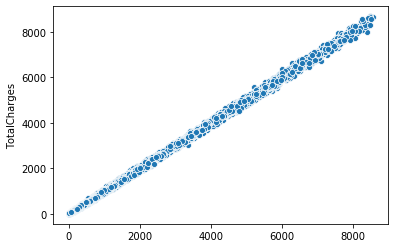

In [19]:
sns.scatterplot(train_data['MonthlyCharges']*train_data['tenure'],train_data['TotalCharges'])

TotalCharges is equivalent to tenure * monthlycharges and dhus can be dropped.

#### Correlations

In [20]:
# Numerical correlation with pearson correlation
corr_num = train_data.corr()

In [21]:
corr_num

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.250329,0.828741
MonthlyCharges,0.250329,1.000000,0.649686
TotalCharges,0.828741,0.649686,1.000000


In [22]:
# Defining spearman correlation function for all variables
def corr_spr(dataframe):
    mat = []
    for i in dataframe.columns:
        for j in dataframe.columns:
            mat.append(spearmanr(dataframe[i], dataframe[j])[0])
    return mat

In [23]:
# list of spearman correlation values
corr_spr_list = corr_spr(train_data.iloc[:,0:])
#converting spearman correlation values into dataframe
corr_spr_mat = pd.DataFrame(np.array(corr_spr_list).reshape(20,20), columns = train_data.iloc[:,0:].columns, index=train_data.iloc[:,0:].columns)

In [24]:
# Correlations with respect to churn
corr_spr_mat['Churn'].sort_values(ascending=False)

Churn               1.000000
PaperlessBilling    0.190945
MonthlyCharges      0.180819
SeniorCitizen       0.151184
PaymentMethod       0.110728
MultipleLines       0.040590
PhoneService        0.018244
gender             -0.014855
InternetService    -0.023911
StreamingTV        -0.034126
StreamingMovies    -0.049913
Partner            -0.149851
Dependents         -0.168290
DeviceProtection   -0.187980
OnlineBackup       -0.223023
TotalCharges       -0.241920
OnlineSecurity     -0.300032
TechSupport        -0.300083
tenure             -0.378248
Contract           -0.411846
Name: Churn, dtype: float64

In [25]:
#Absolute values of correlation with respect to churn
abs(corr_spr_mat['Churn']).sort_values(ascending=False)

Churn               1.000000
Contract            0.411846
tenure              0.378248
TechSupport         0.300083
OnlineSecurity      0.300032
TotalCharges        0.241920
OnlineBackup        0.223023
PaperlessBilling    0.190945
DeviceProtection    0.187980
MonthlyCharges      0.180819
Dependents          0.168290
SeniorCitizen       0.151184
Partner             0.149851
PaymentMethod       0.110728
StreamingMovies     0.049913
MultipleLines       0.040590
StreamingTV         0.034126
InternetService     0.023911
PhoneService        0.018244
gender              0.014855
Name: Churn, dtype: float64

In [26]:
# Printing feature pairs having hight correlation
thres = 0.5
for i in train_data.columns:
    for j in train_data.columns:
        sp = spearmanr(train_data[i], train_data[j])[0]
        if (abs(sp) > thres) and (abs(sp) < 0.99): 
            print(i,j, sp)
    

tenure Contract 0.6680403856539722
tenure TotalCharges 0.8913135386619329
Contract tenure 0.6680403856539722
MonthlyCharges TotalCharges 0.6356549869100625
TotalCharges tenure 0.8913135386619329
TotalCharges MonthlyCharges 0.6356549869100624


####  Encoding categorical variable

In [27]:
train_data[cat_var].nunique()

gender              2
SeniorCitizen       2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaperlessBilling    2
PaymentMethod       4
Churn               2
dtype: int64

In [28]:
# Categorical variables with binary values
bin_var = ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService','PaperlessBilling','Churn']

In [29]:
# Categorical variables with multiple values
mul_var = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup','DeviceProtection', 'TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']

We perform label/ordinal encoding for binary variables and one-hot encoding for multiple variables

#### Label/ ordinal encoding binary columns

In [30]:
train_data_enc = train_data

In [31]:
# Label encoding the binary columns of train data
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
train_data_enc[bin_var] = ord_enc.fit_transform(train_data[bin_var])

In [32]:
# For test data
test_data_enc = test_data
test_data_enc[bin_var] = ord_enc.fit_transform(test_data[bin_var])

#### One hot encoding multi-category columns

In [33]:
train_data_ohe = train_data_enc

In [34]:
train_data_ohe = pd.get_dummies(data=train_data_enc, columns=mul_var, drop_first=True) 
# drop_first required to get k-1 columns and avoid dummy variable trap

In [35]:
# For test data
test_data_ohe = test_data_enc
test_data_ohe = pd.get_dummies(data=test_data_enc, columns=mul_var, drop_first=True) 
# drop_first required to get k-1 columns and avoid dummy variable trap

#### Feature scaling

In [36]:
# Separating into feature and target data
X = train_data_ohe.loc[:, train_data_ohe.columns != 'Churn']
y = train_data_ohe['Churn']

In [37]:
# Separating into feature and target data for test data
Xt = test_data_ohe.loc[:, test_data_ohe.columns != 'Churn']
yt = test_data_ohe['Churn']

 **Feature scaling using Min-Max Scalar**

In [38]:
# Feature scaling for training data
from sklearn.preprocessing import MinMaxScaler
mm_sc = MinMaxScaler()
sf = mm_sc.fit_transform(X.values) # feature scaled (return numpy array)
X_sc = pd.DataFrame(sf, index=X.index, columns=X.columns) # convert back to dataframe

In [39]:
# Feature scaling for test data
sf = mm_sc.fit_transform(Xt.values) # feature scaled (return numpy array)
Xt_sc = pd.DataFrame(sf, index=Xt.index, columns=Xt.columns) # convert back to dataframe

## Machine Learning modeling

Models -> Random Forest, Logistic regression, KNN, SVM, XGB

### Random Forest

In [40]:
%%time
# Random forest grid search for best parameters
from sklearn.ensemble import RandomForestClassifier
RF_cls = RandomForestClassifier(random_state = 0)
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [50, 100, 200, 300, 400], 'max_features': ['auto', None, 'log2']}]
RF_GCV = GridSearchCV(estimator = RF_cls, 
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           n_jobs = -1,
                           return_train_score=True)
RF_GCV = RF_GCV.fit(X_sc, y)
best_accuracy = RF_GCV.best_score_
best_parameters = RF_GCV.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 79.80 %
Best Parameters: {'max_features': 'auto', 'n_estimators': 400}
CPU times: user 2.8 s, sys: 164 ms, total: 2.96 s
Wall time: 36.7 s
